In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display

import copy
import random
import time

Это игрушечно -исследовательское задание
Перед Вами задача бинарной классификации. Как модель мы будем использывать двуслойный перцептрон.
Изучите, как отрабатывают различные оптимизаторы на этой задаче. Обязательно попробовать  Adam, RMSProp, SGD, L-BFGS. Другие тоже можно

Сделать выводы по полученным результатам.

In [63]:
#  Делаем рандомную задачу бинарной классификации. По умолчанию make_classification порождает объект с 20 признаками. 
# Это значение можно варьировать. И его надо подавать как input_size в моддель
X, Y = make_classification(n_samples=200)

# Делим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

# перегоняем все в торч
x_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)

x_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [64]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([160, 20]),
 torch.Size([40, 20]),
 torch.Size([160]),
 torch.Size([40]))

In [65]:
# Cтроим простой перцептрончик: Один линейный слой потом Релу (что это такое, кстати?=)), еще линейный слой и сигмоиду, которая будет выдавать вероятности классов
# hidden size можно варьировать. input_size - кол-во признаков в объекте

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size

        self.linear1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        hidden = self.linear1(x)
        relu = self.relu(hidden)
        output = self.linear2(relu)
        output = self.sigmoid(output)
        return output

In [66]:


# Критерий/ функция потерь
criterion = torch.nn.BCELoss()

 # Оптимизаторы. Можете потыкать все из торча. обязательно Adam, RMSProp, SGD, L-BFGS
optimizers = [optim.Adam, 
              optim.RMSprop, optim.LBFGS]

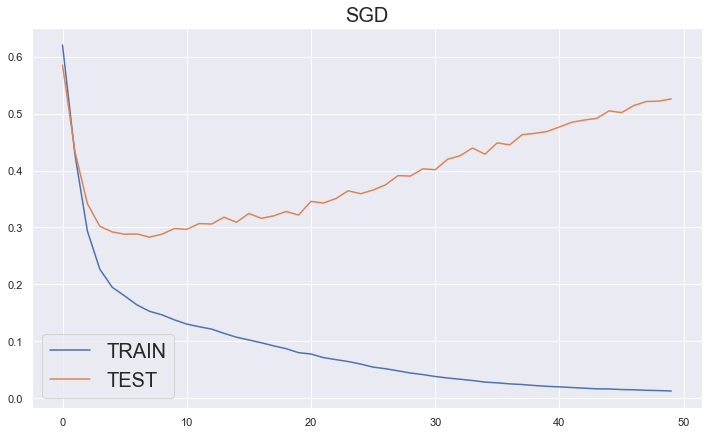

In [67]:
# модель
model = MLP(20, 10)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.2)

sns.set()
# колво эпох. Меняйте
n_epochs = 50 

# размер батча. Тоже меняйте если хотите
batch_size = 8 

epoch_array = []
epoch_test_array = []
for epoch in range(n_epochs):
    
    # Тут игрушечный пример как делить на батчи
    permutation = torch.randperm(x_train.size()[0])
    loss_array = []

    model.train()
    
    for i in range(0,x_train.size()[0], batch_size):

        #  your code here 
        optimizer.zero_grad()
        
        # Бьем на батчи. В таком мигрушечном примере это не обязательно, но мы будем делать все по феншую
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train[indices], y_train[indices]

        # Считаем лосс и добавляем его значение в массив
        outputs = model.forward(batch_x)
        loss = criterion(outputs.squeeze(), batch_y)
        
        loss_array.append(loss.item())
        loss.backward()


        #  your code here 
        optimizer.step()


    # Будем проверять как отрабатывает модель на тестовом датасете (ЗАЧЕМ?)
    # ТАк еж разбиваем на батчи, считаем лосс, но веса модели не обновляем
    test_permutation = torch.randperm(x_test.size()[0])
    loss_test_array = []
    model.eval()
    for i in range(0,x_test.size()[0], batch_size):

        indices = test_permutation[i:i+batch_size]
        batch_x, batch_y = x_test[indices], y_test[indices]
        outputs = model.forward(batch_x)
        loss = criterion(outputs.squeeze(), batch_y)
        loss_test_array.append(loss.item())

    # усредняем лосс на обучении и тесте по эпохе  и выводим график
    epoch_array.append(np.mean(loss_array))
    epoch_test_array.append(np.mean(loss_test_array))

    display.clear_output(wait=True)
    plt.figure(figsize =(12, 7))
    plt.plot(epoch_array, label ="TRAIN")
    plt.plot(epoch_test_array, label ="TEST")
    plt.legend(loc="best", fontsize=20)
    plt.title('SGD', fontsize=20)
    plt.show()

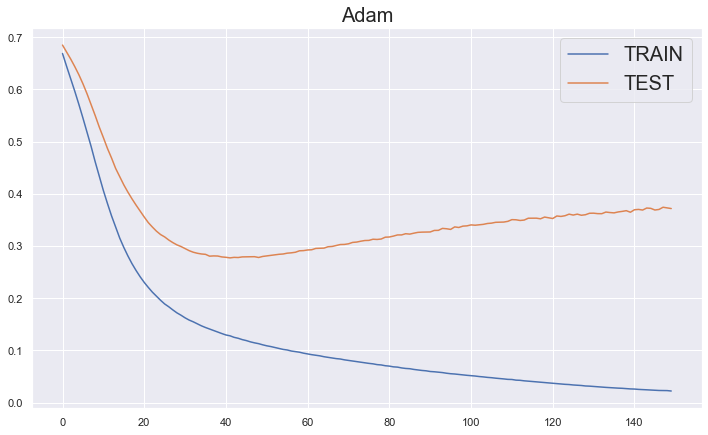

In [68]:
# модель
model = MLP(20, 10)
optimizer = optim.Adam(model.parameters())

sns.set()
# колво эпох. Меняйте
n_epochs = 150 

# размер батча. Тоже меняйте если хотите
batch_size = 8 

epoch_array = []
epoch_test_array = []
for epoch in range(n_epochs):
    
    # Тут игрушечный пример как делить на батчи
    permutation = torch.randperm(x_train.size()[0])
    loss_array = []

    model.train()
    
    for i in range(0,x_train.size()[0], batch_size):

        #  your code here 
        optimizer.zero_grad()
        
        # Бьем на батчи. В таком мигрушечном примере это не обязательно, но мы будем делать все по феншую
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train[indices], y_train[indices]

        # Считаем лосс и добавляем его значение в массив
        outputs = model.forward(batch_x)
        loss = criterion(outputs.squeeze(), batch_y)
        
        loss_array.append(loss.item())
        loss.backward()


        #  your code here 
        optimizer.step()


    # Будем проверять как отрабатывает модель на тестовом датасете (ЗАЧЕМ?)
    # ТАк еж разбиваем на батчи, считаем лосс, но веса модели не обновляем
    test_permutation = torch.randperm(x_test.size()[0])
    loss_test_array = []
    model.eval()
    for i in range(0,x_test.size()[0], batch_size):

        indices = test_permutation[i:i+batch_size]
        batch_x, batch_y = x_test[indices], y_test[indices]
        outputs = model.forward(batch_x)
        loss = criterion(outputs.squeeze(), batch_y)
        loss_test_array.append(loss.item())

    # усредняем лосс на обучении и тесте по эпохе  и выводим график
    epoch_array.append(np.mean(loss_array))
    epoch_test_array.append(np.mean(loss_test_array))

    display.clear_output(wait=True)
    plt.figure(figsize =(12, 7))
    plt.plot(epoch_array, label ="TRAIN")
    plt.plot(epoch_test_array, label ="TEST")
    plt.legend(loc="best", fontsize=20)
    plt.title('Adam', fontsize=20)
    plt.show()

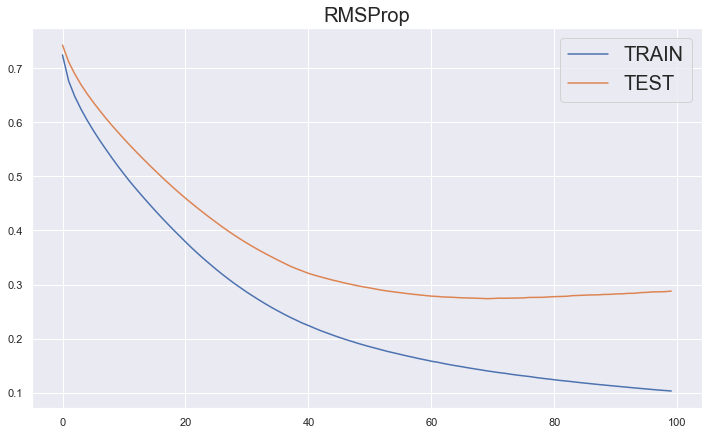

In [79]:
# модель
model = MLP(20, 10)
optimizer = optim.RMSprop(model.parameters(), lr=0.0005)

sns.set()
# колво эпох. Меняйте
n_epochs = 100 

# размер батча. Тоже меняйте если хотите
batch_size = 8

epoch_array = []
epoch_test_array = []
for epoch in range(n_epochs):
    
    # Тут игрушечный пример как делить на батчи
    permutation = torch.randperm(x_train.size()[0])
    loss_array = []

    model.train()
    
    for i in range(0,x_train.size()[0], batch_size):

        #  your code here 
        optimizer.zero_grad()
        
        # Бьем на батчи. В таком мигрушечном примере это не обязательно, но мы будем делать все по феншую
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train[indices], y_train[indices]

        # Считаем лосс и добавляем его значение в массив
        outputs = model.forward(batch_x)
        loss = criterion(outputs.squeeze(), batch_y)
        
        loss_array.append(loss.item())
        loss.backward()


        #  your code here 
        optimizer.step()


    # Будем проверять как отрабатывает модель на тестовом датасете (ЗАЧЕМ?)
    # ТАк еж разбиваем на батчи, считаем лосс, но веса модели не обновляем
    test_permutation = torch.randperm(x_test.size()[0])
    loss_test_array = []
    model.eval()
    for i in range(0,x_test.size()[0], batch_size):

        indices = test_permutation[i:i+batch_size]
        batch_x, batch_y = x_test[indices], y_test[indices]
        outputs = model.forward(batch_x)
        loss = criterion(outputs.squeeze(), batch_y)
        loss_test_array.append(loss.item())

    # усредняем лосс на обучении и тесте по эпохе  и выводим график
    epoch_array.append(np.mean(loss_array))
    epoch_test_array.append(np.mean(loss_test_array))

    display.clear_output(wait=True)
    plt.figure(figsize =(12, 7))
    plt.plot(epoch_array, label ="TRAIN")
    plt.plot(epoch_test_array, label ="TEST")
    plt.legend(loc="best", fontsize=20)
    plt.title('RMSProp', fontsize=20)
    plt.show()

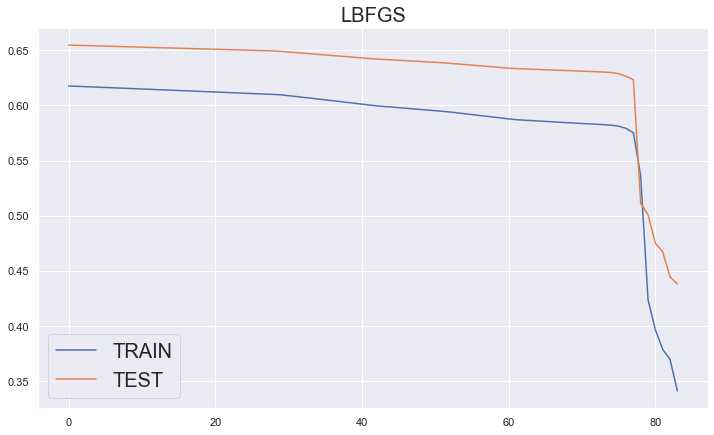

In [ ]:
# модель
model = MLP(20, 10)
optimizer = optim.LBFGS(model.parameters(), lr=0.001, history_size=3, max_iter=4)

sns.set()
# колво эпох. Меняйте
n_epochs = 100

# размер батча. Тоже меняйте если хотите
batch_size = 200

epoch_array = []
epoch_test_array = []
for epoch in range(n_epochs):
    
    # Тут игрушечный пример как делить на батчи
    permutation = torch.randperm(x_train.size()[0])
    loss_array = []

    model.train()
    
    for i in range(0,x_train.size()[0], batch_size):

        
        # Бьем на батчи. В таком мигрушечном примере это не обязательно, но мы будем делать все по феншую
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train[indices], y_train[indices]
        
        def closure():
            optimizer.zero_grad()
            outputs = model.forward(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)

            loss_array.append(loss.item())
            loss.backward()
            return loss
        
        #  your code here 
        optimizer.step(closure)


    # Будем проверять как отрабатывает модель на тестовом датасете (ЗАЧЕМ?)
    # ТАк еж разбиваем на батчи, считаем лосс, но веса модели не обновляем
    test_permutation = torch.randperm(x_test.size()[0])
    loss_test_array = []
    model.eval()
    for i in range(0,x_test.size()[0], batch_size):

        indices = test_permutation[i:i+batch_size]
        batch_x, batch_y = x_test[indices], y_test[indices]
        outputs = model.forward(batch_x)
        loss = criterion(outputs.squeeze(), batch_y)
        loss_test_array.append(loss.item())

    # усредняем лосс на обучении и тесте по эпохе  и выводим график
    epoch_array.append(np.mean(loss_array))
    epoch_test_array.append(np.mean(loss_test_array))

    display.clear_output(wait=True)
    plt.figure(figsize =(12, 7))
    plt.plot(epoch_array, label ="TRAIN")
    plt.plot(epoch_test_array, label ="TEST")
    plt.legend(loc="best", fontsize=20)
    plt.title('LBFGS', fontsize=20)
    plt.show()

ОПИШИТЕ ПОЛУЧЕНННЫЕ РЕЗУЛЬТАТЫ

Перцептронам свойственно переобучение. Об этом говорит то, что начиная с какой-то эпохи качество на тестовой выборке падает, но на тренировочной - растёт. На наилучшей эпохе по тестовой выборке все оптимизаторы показали примерно одинаковое качество: ~0.28 С помощью параметра `lr` можно регулировать, насколько быстро учится модель и насколько точно. Если поставить маленький `lr`, то потребуется много эпох, чтобы обучить модель, если поставить сильно большой `lr`, то модель быстро переобучится.